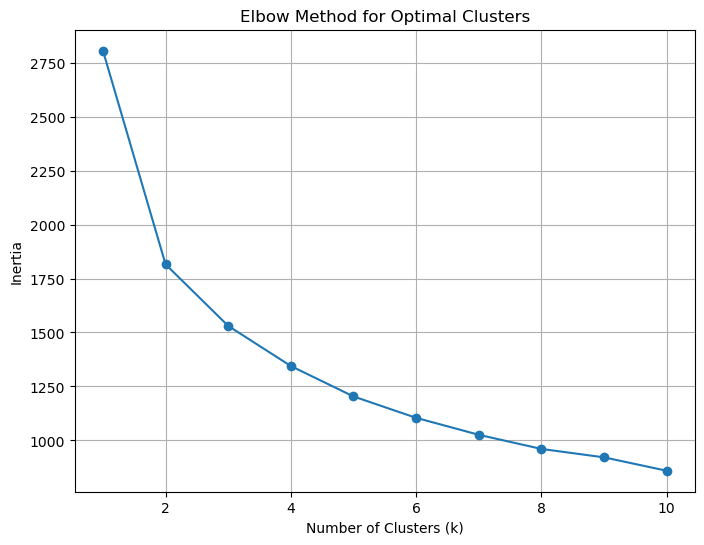

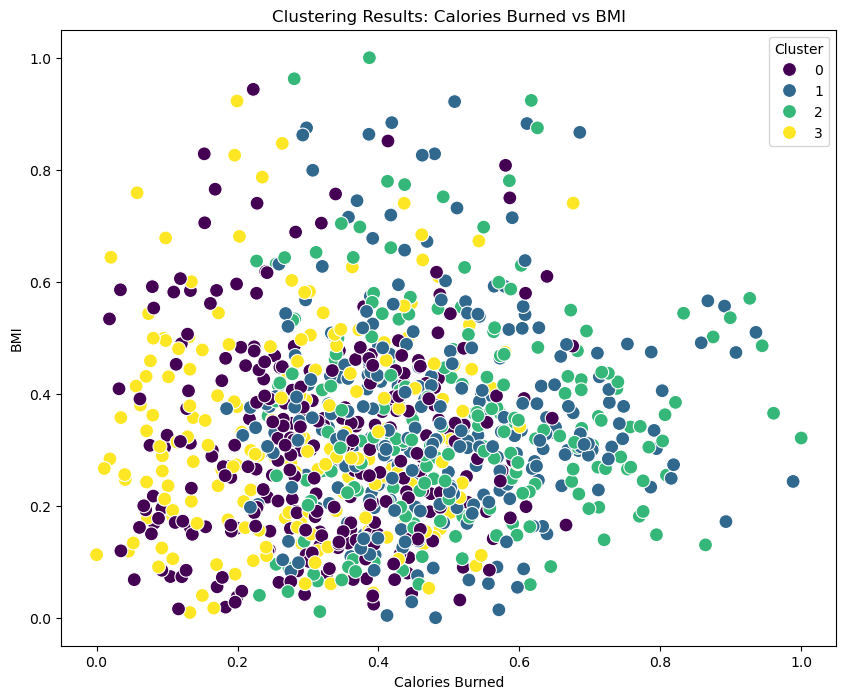

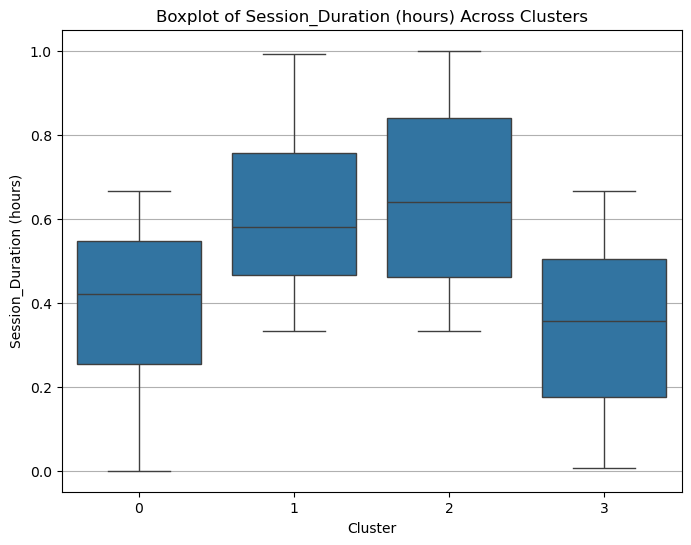

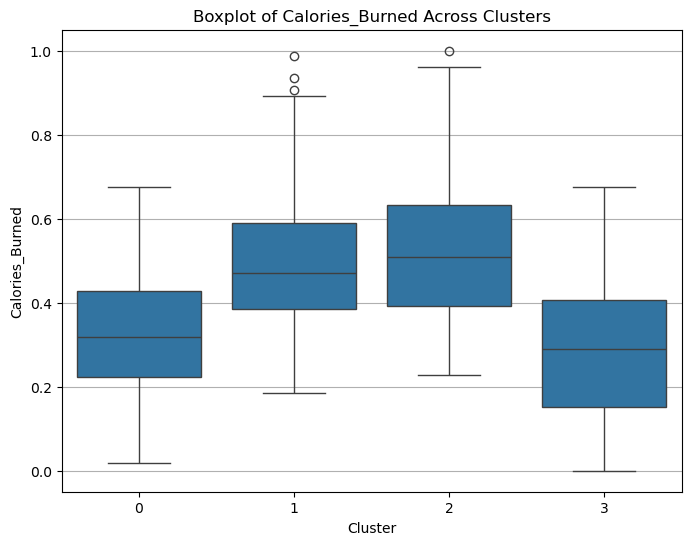

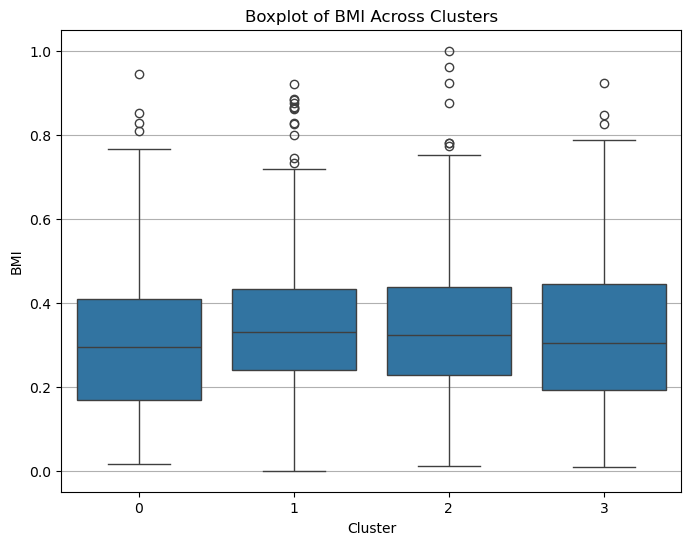

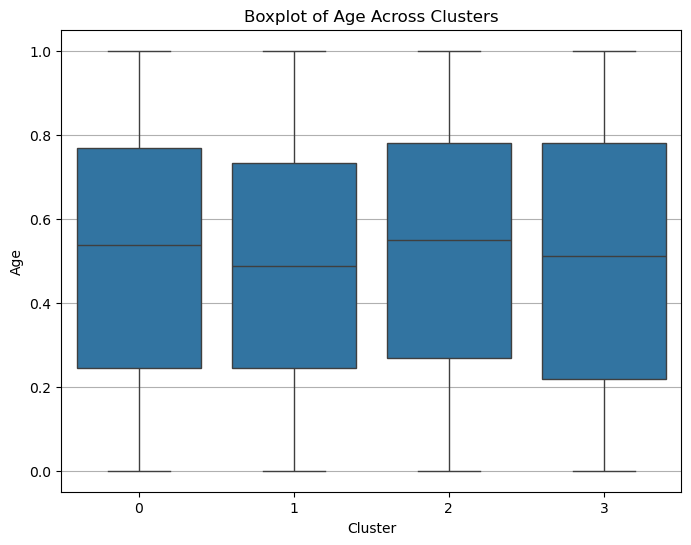

Cluster Summary:
              Age    Gender  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  \
Cluster                                                                    
0        0.506507  0.363958     0.323457    0.404028  0.490622  0.511358   
1        0.482875  0.528369     0.394718    0.436667  0.493999  0.497539   
2        0.524618  0.771028     0.424875    0.513458  0.529475  0.452317   
3        0.510686  0.484536     0.374442    0.442165  0.539255  0.464549   

         Resting_BPM  Session_Duration (hours)  Calories_Burned  Workout_Type  \
Cluster                                                                         
0           0.505006                  0.395336         0.321426      2.466431   
1           0.501330                  0.609976         0.489853      0.482270   
2           0.506620                  0.656137         0.522875      2.500000   
3           0.530069                  0.342062         0.283787      0.438144   

         Fat_Percentage  Water_Intake (

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
gym_data = pd.read_csv('gym_members_exercise_tracking.csv' )

# Step 2: Data Cleaning
# Handle missing values
for column in ["Gender", "Workout_Type"]:
    gym_data[column] = gym_data[column].fillna(gym_data[column].mode()[0])  # Mode for categorical
gym_data.fillna(gym_data.median(numeric_only=True), inplace=True)  # Median for numeric

# Step 3: Data Preprocessing
# Scale numeric columns
numeric_columns = [
    "Age", "Weight (kg)", "Height (m)", "Max_BPM", "Avg_BPM",
    "Resting_BPM", "Session_Duration (hours)", "Calories_Burned",
    "Fat_Percentage", "Water_Intake (liters)", "Workout_Frequency (days/week)", "BMI"
]
scaler = MinMaxScaler()
gym_data[numeric_columns] = scaler.fit_transform(gym_data[numeric_columns])

# Encode categorical columns
encoder = LabelEncoder()
for column in ["Gender", "Workout_Type"]:
    gym_data[column] = encoder.fit_transform(gym_data[column])

# Step 4: Determine Optimal Clusters (Elbow Method)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(gym_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Step 5: Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
gym_data['Cluster'] = kmeans.fit_predict(gym_data)

# Step 6: Visualize Clustering Results
# Scatter plot: Calories Burned vs BMI
plt.figure(figsize=(10, 8))
sns.scatterplot(data=gym_data, x="Calories_Burned", y="BMI", hue="Cluster", palette="viridis", s=100)
plt.title("Clustering Results: Calories Burned vs BMI")
plt.xlabel("Calories Burned")
plt.ylabel("BMI")
plt.legend(title="Cluster")
plt.show()

# Boxplots for key features
for feature in ["Session_Duration (hours)", "Calories_Burned", "BMI", "Age"]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=gym_data, x="Cluster", y=feature)
    plt.title(f"Boxplot of {feature} Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.grid(axis="y")
    plt.show()

# Step 7: Summarize Cluster Characteristics
cluster_summary = gym_data.groupby("Cluster").mean()
print("Cluster Summary:")
print(cluster_summary)